In [9]:
import pandas as pd
import requests
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt

# Gathering

In [102]:
#importing the file into a dataFrame
arch_df =pd.read_csv('twitter-archive-enhanced.csv')

In [103]:
#download the file programmaticly and import it into a dataFrame
image_predictions_url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(image_predictions_url)
with open('image_predictions.tsv','wb')as file:
    file.write(response.content)
   

In [104]:
img_predectins_df=pd.read_csv('image_predictions.tsv',sep='\t')


In [6]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


NameError: name 'OAuthHandler' is not defined

In [12]:
#get data from json file to dataframe
file_df=[]
with open('tweet-json.txt','r')as tweet_json:
    for line in tweet_json:
        file_df.append(json.loads(line)) 

In [13]:
file_df[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

In [105]:
#creating the DF
tweet_info=pd.DataFrame(file_df,columns=['id','retweet_count','favorite_count'])

# Assessing Data 

In [106]:
tweet_info.sample(5)

,id,retweet_count,favorite_count
858,763167063695355904,3484,0
2210,668587383441514497,1174,1760
1965,673342308415348736,649,1362
1594,686286779679375361,1887,4392
1726,679872969355714560,749,2365


In [16]:
img_predectins_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1567,794205286408003585,https://pbs.twimg.com/media/CwWVe_3WEAAHAvx.jpg,3,pedestal,0.662660,False,fountain,0.294827,False,brass,0.020371,False
810,692187005137076224,https://pbs.twimg.com/media/CZskaEIWIAUeTr5.jpg,2,Siberian_husky,0.810592,True,malamute,0.119745,True,Eskimo_dog,0.029265,True
142,668614819948453888,https://pbs.twimg.com/media/CUdloW8WEAAxB_Y.jpg,1,bustard,0.380772,False,pelican,0.100554,False,crane,0.084713,False
529,676811746707918848,https://pbs.twimg.com/media/CWSEsO9WwAAX-fZ.jpg,1,Chihuahua,0.440916,True,Pomeranian,0.345806,True,cocker_spaniel,0.060331,True
852,695816827381944320,https://pbs.twimg.com/media/CagJtjYW8AADoHu.jpg,1,Pomeranian,0.382234,True,chow,0.208302,True,sunglasses,0.131328,False
522,676582956622721024,https://pbs.twimg.com/media/CWO0m8tUwAAB901.jpg,1,seat_belt,0.790028,False,Boston_bull,0.196307,True,French_bulldog,0.012429,True
136,668507509523615744,https://pbs.twimg.com/media/CUcECBYWcAAzFRg.jpg,1,basenji,0.055379,True,Shetland_sheepdog,0.054322,True,whippet,0.051913,True
1003,708834316713893888,https://pbs.twimg.com/media/CdZI_bpWEAAm1fs.jpg,1,Eskimo_dog,0.283945,True,giant_panda,0.218252,False,malamute,0.180401,True
470,675113801096802304,https://pbs.twimg.com/media/CV58a4nXAAApywo.jpg,1,bow,0.168020,False,quill,0.108807,False,joystick,0.043312,False
1784,829141528400556032,https://pbs.twimg.com/media/C4GzztSWAAA_qi4.jpg,2,golden_retriever,0.573140,True,cocker_spaniel,0.111159,True,gibbon,0.094127,False


In [17]:
arch_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2046,671520732782923777,NaN,NaN,2015-12-01 02:46:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Alejandro. He's an extremely seductive pu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671520732...,10,10,Alejandro,None,None,None,None
1446,696490539101908992,6.964887e+17,4.196984e+09,2016-02-08 00:27:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After reading the comments I may have overesti...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2020,672095186491711488,NaN,NaN,2015-12-02 16:49:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tuco. That's the toast that killed his...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672095186...,9,10,Tuco,None,None,None,None
554,803773340896923648,NaN,NaN,2016-11-30 01:31:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Diogi. He fell in the pool as soon as ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/803773340...,12,10,Diogi,None,None,None,puppo
2068,671138694582165504,NaN,NaN,2015-11-30 01:28:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Me running from commitment. 10/10 https://t.co...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671138694...,10,10,None,None,None,None,None
1296,707969809498152960,NaN,NaN,2016-03-10 16:42:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Rufus. He's a Honeysuckle Firefox. Curly ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707969809...,11,10,Rufus,None,None,None,None
1008,747594051852075008,NaN,NaN,2016-06-28 00:54:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Again w the sharks guys. This week is about do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747594051...,11,10,None,None,None,None,None
1627,684594889858887680,NaN,NaN,2016-01-06 04:38:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""FOR THE LAST TIME I DON'T WANNA PLAY TWISTER ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684594889...,10,10,None,None,None,None,None
1013,747219827526344708,NaN,NaN,2016-06-27 00:07:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Atticus. He's remaining calm but his c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747219827...,11,10,Atticus,None,None,None,None
1761,678675843183484930,NaN,NaN,2015-12-20 20:38:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Exotic pup here. Tail long af. Throat looks sw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678675843...,2,10,None,None,None,None,None


In [18]:
tweet_info.columns

Index(['id', 'retweet_count', 'favorite_count'], dtype='object')

In [19]:
img_predectins_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [20]:
arch_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [21]:
#check duplicated records
print(img_predectins_df.duplicated().sum())
print(arch_df.duplicated().sum())
print(tweet_info.duplicated().sum())

0
0
0


In [22]:
img_predectins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
#check the deffirence between the two tweets
img_predectins_df.query('jpg_url=="https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg"')
#only ID

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1738,822244816520155136,https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg,1,Samoyed,0.585441,True,Pomeranian,0.193654,True,Arctic_fox,0.071648,False
1746,823269594223824897,https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg,1,Samoyed,0.585441,True,Pomeranian,0.193654,True,Arctic_fox,0.071648,False


In [24]:
img_predectins_df['jpg_url'].value_counts()

https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg                                            2
https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg                                            2
https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg                                            2
                                                                                          ..
https://pbs.twimg.com/media/CqWcgcqWcAI43jm.jpg                                            1
https://pbs.twimg.com/media/CUibq3uVAAAup_O.jpg                                            1
https://pbs.twimg.com/media/CU6xVkbWsAAeHeU.jpg                                            1
https://pbs.twimg.com/media/CcgF5ovW8AACrEU.jpg                                            1
https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg                       

In [25]:
#compare the message of first tweet and the second 
arch_df.query('tweet_id==795076730285391872')['text']

626    This is Bailey. She loves going down slides bu...
Name: text, dtype: object

In [26]:
arch_df.query('tweet_id==	823269594223824897')['text']
# its a retweet 

411    RT @dog_rates: We only rate dogs. Please don't...
Name: text, dtype: object

In [28]:
arch_df['name'].value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Jaspers      1
Ginger       1
Edgar        1
Al           1
Jo           1
Name: name, Length: 957, dtype: int64

In [29]:
arch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [30]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


# Cleaning

# Quality

In [31]:
# for arch_df
#1--in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id and retweeted_status_timestamp have to many missing values
#2--tweet_id or any id in any DF must be string ,, img_num in img_prediction_df must be string
#3-- timestamp have ('0000') must be removed
#4-- 
#5-- 
#6-- timestamp must be datetime type
#7-- there are alot of none in name and  stage column arch_df and some with lower and uppercase
#8-- remove retweets

### Tidiness
#1-- doggo	floofer	pupper	puppo must be in one column 
#2-- tweet data fram is related to arch_df must be merged

In [107]:
#copying dataframes to keep the orginal
clean_arch_df=arch_df.copy()
clean_tweet_info=tweet_info.copy()
clean_img_predectins_df=img_predectins_df.copy()

In [109]:
clean_arch_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
355,830956169170665475,NaN,NaN,2017-02-13 01:46:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Reggie. He hates puns. 12/10 ligh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/830956169...,12,10,Reggie,None,None,None,None
1651,683498322573824003,NaN,NaN,2016-01-03 04:01:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Griffin. He's desperate for both a phy...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683498322...,11,10,Griffin,None,None,None,None
1277,709042156699303936,NaN,NaN,2016-03-13 15:43:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Klevin. He's addicted to sandwiches (y...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709042156...,9,10,Klevin,None,None,None,None
398,825026590719483904,NaN,NaN,2017-01-27 17:04:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Pablo. He's one gorgeous puppo. A...,NaN,NaN,NaN,https://www.gofundme.com/my-puppys-double-cata...,12,10,Pablo,None,None,None,puppo
1557,688804835492233216,NaN,NaN,2016-01-17 19:27:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you stumble but recover quickly cause you...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688804835...,12,10,None,None,None,None,None


# DEFINING

In [33]:
#1-- i will drop this columns with too many missing values with -> df.drop('a', inplace=True, axis=1) (done)
#2-- id,img_num will be converted to string -> .toString
#3-- slice timestamp to extract (" +0000")
#4-- convert timestamp to datetime
#5-- all recored in rating_numerator will be > 10 and will be 13 for big numbers 
#6-- rating_denominator must be equal 10
#7-- make all names with lowercase
#8-- remove retweets from arch_df by removing records with retweeted_status_id that's not null then drop this columns 


# Quality issues control

# define

In [ ]:
# drop this columns with too many missing values

# code

In [110]:
clean_arch_df.drop("in_reply_to_user_id",axis=1,inplace=True)
clean_arch_df.drop("retweeted_status_user_id",axis=1,inplace=True)
clean_arch_df.drop("retweeted_status_timestamp",axis=1,inplace=True)

# test

In [111]:
clean_arch_df.head(1)

,tweet_id,in_reply_to_status_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


# define

###### slice timestamp to extract (" +0000")


# code

In [112]:
clean_arch_df['timestamp']=clean_arch_df['timestamp'].str[:19]        

# test

In [113]:
clean_arch_df['timestamp']

0       2017-08-01 16:23:56
1       2017-08-01 00:17:27
2       2017-07-31 00:18:03
3       2017-07-30 15:58:51
4       2017-07-29 16:00:24
               ...         
2351    2015-11-16 00:24:50
2352    2015-11-16 00:04:52
2353    2015-11-15 23:21:54
2354    2015-11-15 23:05:30
2355    2015-11-15 22:32:08
Name: timestamp, Length: 2356, dtype: object

# define

###### change ids to string and timestamp to datetime

# code

In [114]:
clean_arch_df['tweet_id']=clean_arch_df['tweet_id'].astype(str)
img_predectins_df['tweet_id']=img_predectins_df['tweet_id'].astype(str)
clean_tweet_info['id']=clean_tweet_info['id'].astype(str)
clean_arch_df['timestamp'] = pd.to_datetime(clean_arch_df['timestamp'], format="%Y-%m-%d %H:%M:%S")

# test

In [115]:
print(clean_arch_df['tweet_id'].dtype)
print(img_predectins_df['tweet_id'].dtype)
print(clean_tweet_info['id'].dtype)
print(clean_arch_df['timestamp'].dtype)

object
object
object
datetime64[ns]


# define

###### make all names lower case

# code

In [116]:
clean_arch_df['name']=clean_arch_df['name'].str.lower()

# test

In [117]:
clean_arch_df['name']

0        phineas
1          tilly
2         archie
3          darla
4       franklin
          ...   
2351        none
2352           a
2353           a
2354           a
2355        none
Name: name, Length: 2356, dtype: object

# define

###### drop in_reply_to_status_id and retweeted_status_id

# code

In [118]:
#drop in_reply_to_status_id and retweeted_status_id from table 
clean_arch_df.drop("in_reply_to_status_id",axis=1,inplace=True)
clean_arch_df.drop("retweeted_status_id",axis=1,inplace=True)

# Test

In [119]:
clean_arch_df.sample(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
291,838085839343206401,2017-03-04 17:56:49,"<a href=""http://twitter.com/download/iphone"" r...",@bragg6of8 @Andy_Pace_ we are still looking fo...,NaN,15,10,none,None,None,None,None
87,875144289856114688,2017-06-15 00:13:52,"<a href=""http://twitter.com/download/iphone"" r...",Meet Nugget and Hank. Nugget took Hank's bone....,https://twitter.com/dog_rates/status/875144289...,13,10,nugget,None,None,None,None
2213,668567822092664832,2015-11-22 23:12:44,"<a href=""http://twitter.com/download/iphone"" r...",This is Marvin. He can tie a bow tie better th...,https://twitter.com/dog_rates/status/668567822...,11,10,marvin,None,None,None,None
821,770293558247038976,2016-08-29 16:14:30,"<a href=""http://twitter.com/download/iphone"" r...",This is Jackson. There's nothing abnormal abou...,https://twitter.com/dog_rates/status/770293558...,10,10,jackson,None,None,None,None
80,877316821321428993,2017-06-21 00:06:44,"<a href=""http://twitter.com/download/iphone"" r...",Meet Dante. At first he wasn't a fan of his ne...,https://twitter.com/dog_rates/status/877316821...,13,10,dante,None,None,None,None
630,794332329137291264,2016-11-04 00:15:59,"<a href=""http://twitter.com/download/iphone"" r...",This is Nimbus (like the cloud). He just bough...,https://twitter.com/dog_rates/status/794332329...,12,10,nimbus,None,None,None,None
2018,672139350159835138,2015-12-02 19:44:43,"<a href=""http://twitter.com/download/iphone"" r...",This pup has a heart on its ass and that is do...,https://twitter.com/dog_rates/status/672139350...,12,10,none,None,None,None,None
1749,679047485189439488,2015-12-21 21:15:11,"<a href=""http://twitter.com/download/iphone"" r...",This dog doesn't know how to stairs. Quite tra...,https://twitter.com/dog_rates/status/679047485...,9,10,none,None,None,None,None
1892,674754018082705410,2015-12-10 00:54:28,"<a href=""http://twitter.com/download/iphone"" r...",Just received another perfect photo of dogs an...,https://twitter.com/dog_rates/status/674754018...,12,10,none,None,None,None,None
1090,737678689543020544,2016-05-31 16:14:39,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,https://twitter.com/dog_rates/status/737678689...,11,10,none,None,None,None,None


# Tidyness issues

###### create stage column

In [180]:
clean_arch_df['stage']='None'

In [181]:
clean_arch_df.tail(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
2355,666020888022790149,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,none,None,None,None,None,None


# define

###### marge doggo	floofer	pupper	puppo into one column named stage 

# code

In [182]:
clean_arch_df.loc[clean_arch_df['doggo']=='doggo','stage']='doggo'
clean_arch_df.loc[clean_arch_df['floofer']=='floofer','stage']='floofer'
clean_arch_df.loc[clean_arch_df['pupper']=='pupper','stage']='pupper'
clean_arch_df.loc[clean_arch_df['puppo']=='puppo','stage']='puppo'


In [183]:
# set stage to muliple for dogs with more than one category 
clean_arch_df.loc[(clean_arch_df['pupper']!='None')&(clean_arch_df['doggo']!='None'),'stage']='muliple'
clean_arch_df.loc[(clean_arch_df['puppo']!='None')&(clean_arch_df['doggo']!='None'),'stage']='muliple'
clean_arch_df.loc[(clean_arch_df['floofer']!='None')&(clean_arch_df['doggo']!='None'),'stage']='muliple'


In [187]:
clean_arch_df.loc[(clean_arch_df['pupper']!='None')&(clean_arch_df['doggo']!='None')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
460,817777686764523521,2017-01-07 16:59:28,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,10,dido,doggo,None,pupper,None,muliple
531,808106460588765185,2016-12-12 00:29:28,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12,10,none,doggo,None,pupper,None,muliple
565,802265048156610565,2016-11-25 21:37:47,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",https://twitter.com/dog_rates/status/802265048...,11,10,none,doggo,None,pupper,None,muliple
575,801115127852503040,2016-11-22 17:28:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12,10,bones,doggo,None,pupper,None,muliple
705,785639753186217984,2016-10-11 00:34:48,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10,10,pinot,doggo,None,pupper,None,muliple
733,781308096455073793,2016-09-29 01:42:20,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",https://vine.co/v/5rgu2Law2ut,12,10,none,doggo,None,pupper,None,muliple
778,775898661951791106,2016-09-14 03:27:11,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",https://twitter.com/dog_rates/status/733109485...,12,10,none,doggo,None,pupper,None,muliple
822,770093767776997377,2016-08-29 03:00:36,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None,muliple
889,759793422261743616,2016-07-31 16:50:42,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,maggie,doggo,None,pupper,None,muliple
956,751583847268179968,2016-07-09 01:08:47,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5,10,none,doggo,None,pupper,None,muliple


# Test

In [186]:
clean_arch_df.sample(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
2009,672254177670729728,2015-12-03 03:21:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Rolf. He's having the time of his life...,https://twitter.com/dog_rates/status/672254177...,11,10,rolf,None,None,pupper,None,pupper
1398,699775878809702401,2016-02-17 02:02:25,"<a href=""http://twitter.com/download/iphone"" r...",Meet Fillup. Spaghetti is his main weakness. A...,https://twitter.com/dog_rates/status/699775878...,11,10,fillup,None,None,None,None,None
1633,684241637099323392,2016-01-05 05:14:53,"<a href=""http://twitter.com/download/iphone"" r...",This is Obi. He got camera shy. 12/10 https://...,https://twitter.com/dog_rates/status/684241637...,12,10,obi,None,None,None,None,None
1949,673689733134946305,2015-12-07 02:25:23,"<a href=""http://twitter.com/download/iphone"" r...",When you're having a blast and remember tomorr...,https://twitter.com/dog_rates/status/673689733...,11,10,none,None,None,None,None,None
1187,718460005985447936,2016-04-08 15:26:28,"<a href=""http://twitter.com/download/iphone"" r...",Meet Bowie. He's listening for underground squ...,https://twitter.com/dog_rates/status/718460005...,9,10,bowie,None,None,None,None,None
1441,696877980375769088,2016-02-09 02:07:12,"<a href=""http://twitter.com/download/iphone"" r...",This is Misty. She's in a predicament. Not sur...,https://twitter.com/dog_rates/status/696877980...,9,10,misty,None,None,pupper,None,pupper
335,832645525019123713,2017-02-17 17:38:57,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None,None
1046,743545585370791937,2016-06-16 20:47:36,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Bentley and Millie. They do every...,https://twitter.com/dog_rates/status/743545585...,11,10,bentley,None,None,None,None,None
1833,676146341966438401,2015-12-13 21:07:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Bert. He likes flowers. 10/10 https://...,https://twitter.com/dog_rates/status/676146341...,10,10,bert,None,None,None,None,None
1670,682406705142087680,2015-12-31 03:43:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Patrick. He's a bigass pupper. 7/10 ht...,https://twitter.com/dog_rates/status/682406705...,7,10,patrick,None,None,pupper,None,pupper


In [188]:
clean_arch_df.stage.isnull().sum()

0

In [189]:
clean_arch_df.stage.value_counts()

None       1976
pupper      245
doggo        83
puppo        29
muliple      14
floofer       9
Name: stage, dtype: int64

# define

###### drop 'doggo','floofer','pupper','puppo' columns

# code

In [190]:
clean_arch_df.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

# test

In [191]:
clean_arch_df.shape

(2356, 9)

# define

###### merge clean_tweet_info with clean_arch_info

In [192]:
clean_tweet_info.head(1)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467


In [193]:
clean_arch_df.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,phineas,None


In [194]:
clean_tweet_info.id.nunique()

2354

In [195]:
clean_tweet_info.id.duplicated().sum()

0

In [196]:
clean_arch_df.tweet_id.nunique()

2356

In [197]:
clean_arch_df.tweet_id.duplicated().sum()

0

In [198]:
clean_tweet_info.shape

(2354, 3)

In [199]:
clean_arch_df.shape

(2356, 9)

###### change id column name to tweet_id for merging

In [200]:
clean_tweet_info.rename(columns={'id':'tweet_id'},inplace=True)

# code

In [250]:
tweet_data = pd.merge(clean_tweet_info,clean_arch_df)

# test

In [251]:
tweet_data.head()

,tweet_id,retweet_count,favorite_count,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,8853,39467,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,phineas,None
1,892177421306343426,6514,33819,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,tilly,None
2,891815181378084864,4328,25461,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,archie,None
3,891689557279858688,8964,42908,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,darla,None
4,891327558926688256,9774,41048,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,franklin,None


In [318]:
tweet_data.to_csv('twitter_archive_master.csv',encoding='utf_8',index=False)


# Analysis and visualizations

In [252]:
tweet_data.shape

(2354, 11)

In [253]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2354 non-null   object        
 1   retweet_count       2354 non-null   int64         
 2   favorite_count      2354 non-null   int64         
 3   timestamp           2354 non-null   datetime64[ns]
 4   source              2354 non-null   object        
 5   text                2354 non-null   object        
 6   expanded_urls       2295 non-null   object        
 7   rating_numerator    2354 non-null   int64         
 8   rating_denominator  2354 non-null   int64         
 9   name                2354 non-null   object        
 10  stage               2354 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 220.7+ KB


In [254]:
# change stage data type
tweet_data.stage=tweet_data.stage.astype('category')

In [85]:
#witch source is most commont between tweeter users ? 
tweet_data.source.value_counts()
# its iphone

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [257]:
#clear source column from unnessessary words
tweet_data.source=tweet_data.source.apply(lambda x: x.split('>',)[1])
tweet_data.source=tweet_data.source.apply(lambda x: x.split('<',)[0])
tweet_data.source

IndexError: list index out of range

In [256]:
#year of the highest reach 
pd.DatetimeIndex(tweet_data['timestamp']).year.value_counts()
#2016

2016    1182
2015    690 
2017    482 
Name: timestamp, dtype: int64

In [317]:
tweet_data.name.value_counts()

none       744
a          55 
charlie    12 
lucy       11 
cooper     11 
           .. 
shadoe     1  
grizzie    1  
remus      1  
jett       1  
perry      1  
Name: name, Length: 957, dtype: int64

#### most common name is charlie

In [206]:
#most loved category
doggo_favcount=tweet_data.loc[tweet_data['stage'] == 'doggo', 'favorite_count'].sum()
floofer_favcount=tweet_data.loc[tweet_data['stage'] == 'floofer', 'favorite_count'].sum()
puppo_favcount=tweet_data.loc[tweet_data['stage'] == 'puppo', 'favorite_count'].sum()
pupper_favcount=tweet_data.loc[tweet_data['stage'] == 'pupper', 'favorite_count'].sum()
muliple_favcount=tweet_data.loc[tweet_data['stage'] == 'muliple', 'favorite_count'].sum()


#### pupper

In [259]:
muliple_favcount

185784

In [260]:
doggo_recount=tweet_data.loc[tweet_data['stage'] == 'doggo', 'retweet_count'].sum()
floofer_recount=tweet_data.loc[tweet_data['stage'] == 'floofer', 'retweet_count'].sum()
puppo_recount=tweet_data.loc[tweet_data['stage'] == 'puppo', 'retweet_count'].sum()
pupper_recount=tweet_data.loc[tweet_data['stage'] == 'pupper', 'retweet_count'].sum()
muliple_recount=tweet_data.loc[tweet_data['stage'] == 'muliple', 'retweet_count'].sum()

In [261]:
print(muliple_recount)

83482


Text(0.5, 1.0, 'most common category')

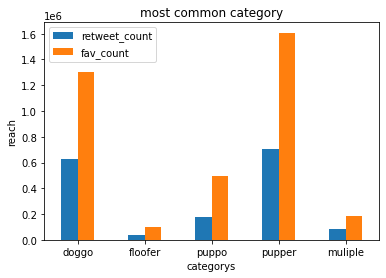

In [312]:
category = ['doggo','floofer','puppo','pupper','muliple']
retweet_count = [doggo_recount,floofer_recount,puppo_recount,pupper_recount,muliple_recount]
fav_count=[doggo_favcount,floofer_favcount,puppo_favcount,pupper_favcount,muliple_favcount]

df = pd.DataFrame({'retweet_count':retweet_count,'fav_count':fav_count},index=category)

reach=df.plot.bar(rot=0)
reach.set_xlabel('categorys')
reach.set_ylabel('reach')
reach.set_title("most common category")

<AxesSubplot:title={'center':'top dogs ratings'}, xlabel='ratings', ylabel='num of dogs'>

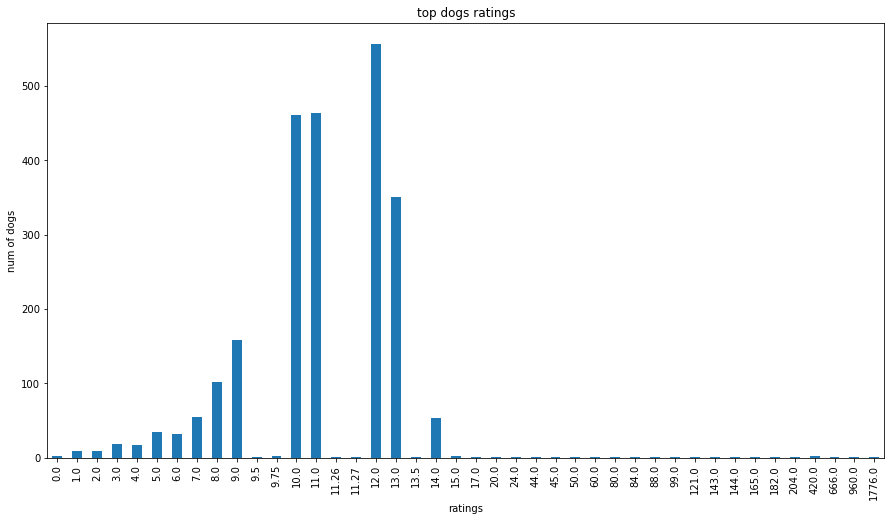

In [322]:
tweet_data.rating_numerator.value_counts().sort_index().plot(kind='bar',xlabel='ratings',ylabel='num of dogs',figsize=(15, 8),title='top dogs ratings')


In [305]:
tweet_data.rating_numerator.value_counts()

12.00      557
11.00      464
10.00      461
13.00      350
9.00       158
8.00       102
7.00       55 
14.00      54 
5.00       35 
6.00       32 
3.00       19 
4.00       17 
2.00       9  
1.00       9  
0.00       2  
420.00     2  
9.75       2  
15.00      2  
960.00     1  
84.00      1  
24.00      1  
17.00      1  
13.50      1  
143.00     1  
121.00     1  
80.00      1  
182.00     1  
165.00     1  
45.00      1  
204.00     1  
1776.00    1  
666.00     1  
99.00      1  
11.27      1  
11.26      1  
88.00      1  
144.00     1  
9.50       1  
20.00      1  
44.00      1  
60.00      1  
50.00      1  
Name: rating_numerator, dtype: int64

# define

###### some rating_numerators have been extracted from text wrongly as shown below

In [231]:
# configuration to show full text
#pd.set_option('display.max_colwidth', -1)
# filter only tweets with decimal numbers 
tweet_data[tweet_data.text.str.extract(r'(\d+\.\d+)', expand=False).notnull()].text

44      This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948                         
258     This is Tycho. She just had new wheels installed. About to do a zoom. 0-60 in 2.4 seconds. 13/10 inspirational as h*ck https://t.co/DKwp2ByMsL                   
339     RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…                     
694     This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS                                 
762     This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
1016    Guys... Dog Jesus 2.0\n13/10 buoyant af https://t.co/CuNA7OwfKQ                                                                               

# code 

In [298]:
# change rating_numerator to the correct rate
tweet_data.loc[1710,'rating_numerator']=11.26

# test

In [303]:
tweet_data.loc[[1710]]

,tweet_id,retweet_count,favorite_count,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
1710,680494726643068929,542,1879,2015-12-25 21:06:00,Twitter for iPhone,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11.26,10,none,None
